In [1]:
from CubicGalileonEmu.load import *
from CubicGalileonEmu.viz import *
from CubicGalileonEmu.pca import *
from CubicGalileonEmu.gp import *
from CubicGalileonEmu.emu import *
from CubicGalileonEmu.mcmc import *

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


if_train_all = False ## Re-train all the models. Time-consuming. 
if_mcmc_all = False  ## Full MCMC run. Time-consuming. 
if_savefig = False

In [2]:
Bk_all, k_all, z_all = load_boost_data()
p_all = load_params()

In [3]:
print(p_all.shape)
print(p_all[:5])

(50, 5)
[[0.31051392 1.085      2.541      0.67373333 0.480012  ]
 [0.32665203 0.9265     3.141      0.65413333 0.579972  ]
 [0.32890386 1.08       2.166      0.70066667 0.220018  ]
 [0.29906712 0.901      2.616      0.72266667 0.279994  ]
 [0.30826209 0.9776     1.678      0.7104     0.319978  ]]


In [4]:
## Data prep
z_index = 1
y_vals = Bk_all[:, z_index, :]
# y_ind = np.arange(0, y_vals.shape[1])
y_ind = k_all

# Train-test split
# test_indices = [0, 14, 35]
# input_params= p_all[test_indices]
# target_vals = Bk_all[:, z_index, :][test_indices]

# Load validation data

Bk_all_val, _, _ = load_boost_data(LIBRARY_BK_FILE_VAL, LIBRARY_ZK_FILE_VAL)
target_vals = Bk_all_val[:, z_index, :]
input_params = load_params(LIBRARY_PARAM_FILE_VAL)

train_indices = [i for i in  np.arange(49)] # if i not in test_indices]
p_all_train = p_all[train_indices]
y_vals_train = Bk_all[:, z_index, :][train_indices]
print('Redshift: ' + str(z_all[z_index]))

Redshift: 0.02


This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.78it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.72661064 0.5535419 ]
 [0.06269503 0.24556046]
 [0.08029511 0.75353189]
 [0.09956949 0.60849411]
 [0.14377916 0.55851978]
 [0.93232044 0.69850757]]
lamUz
[[1.31936391 1.21879662]]
lamWs
[[472.03082156 865.69821377]]
lamWOs
[[14.76570069]]


MCMC sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.12it/s]


Model saved to /home/c2042999/CubicGalileonEmu/CubicGalileonEmu/model/multivariate_model_z_index1.pkl
No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

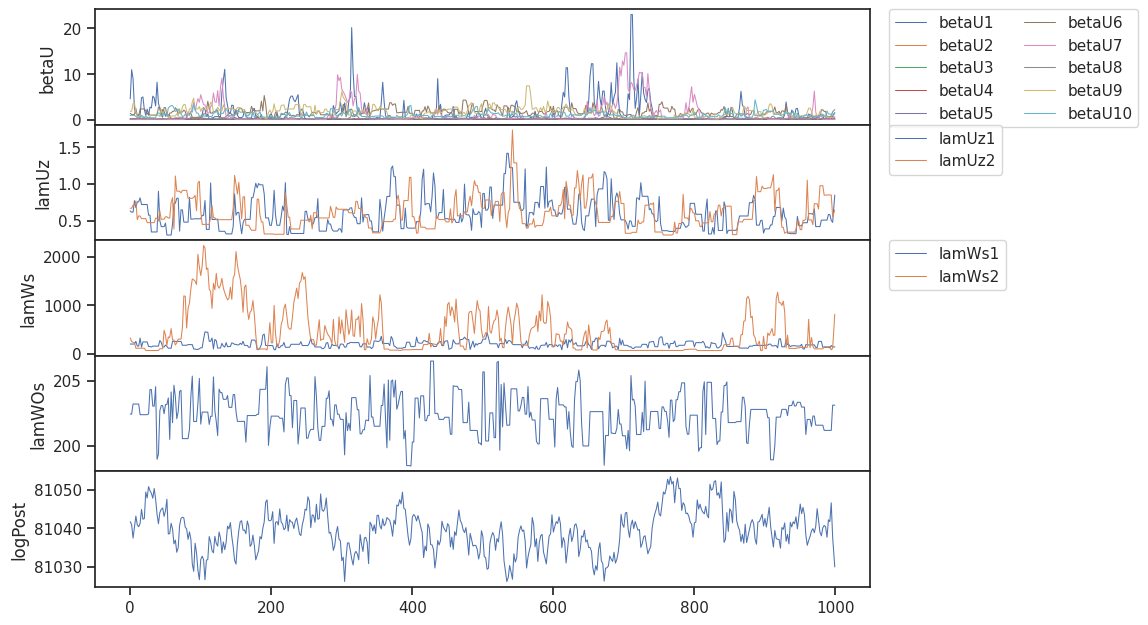

In [5]:
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
print(sepia_data)
model_filename = '/home/c2042999/CubicGalileonEmu/CubicGalileonEmu/model/multivariate_model_z_index' + str(z_index) 

sepia_model = do_pca(sepia_data, exp_variance=0.95)
sepia_model = do_gp_train(sepia_model, model_filename)
plot_train_diagnostics(sepia_model)

In [6]:
sepia_model = gp_load(sepia_model, model_filename)

In [7]:
if if_train_all:
    
    do_gp_train_multiple(model_dir='/home/c2042999/CubicGalileonEmu/CubicGalileonEmu/model/', 
                        p_train_all = p_all[train_indices],
                        y_vals_all = Bk_all[train_indices],
                        y_ind_all = k_all,
                        z_index_range=range(49))

In [8]:
sepia_model_list = load_model_multiple(model_dir='/home/c2042999/CubicGalileonEmu/CubicGalileonEmu/model/', 
                                        p_train_all=p_all[train_indices],
                                        y_vals_all=Bk_all[train_indices],
                                        y_ind_all=k_all,
                                        z_index_range=range(49), 
                                        sepia_model_i=sepia_model)

Number of models loaded: 49
redshift:  0.041
imput_params= [[0.30300782 0.97498    2.37232    0.67       0.02       0.        ]
 [0.30300782 0.97498    2.37232    0.67       0.04512821 0.        ]
 [0.30300782 0.97498    2.37232    0.67       0.07025641 0.        ]
 ...
 [0.30300782 0.97498    2.37232    0.67       0.94974359 3.        ]
 [0.30300782 0.97498    2.37232    0.67       0.97487179 3.        ]
 [0.30300782 0.97498    2.37232    0.67       1.         3.        ]]
(768,)
[ 0.020046  0.035041  0.049231  0.063783  0.080073  0.096163  0.111083
  0.126058  0.142273  0.158546  0.17375   0.188953  0.204907  0.220756
  0.23588   0.2514    0.267535  0.283568  0.299022  0.314451  0.330372
  0.346141  0.361624  0.377134  0.392932  0.408854  0.424564  0.440253
  0.455999  0.471626  0.48727   0.502856  0.518488  0.534347  0.550082
  0.565732  0.581496  0.597222  0.612804  0.628434  0.644267  0.660051
  0.675724  0.691403  0.707174  0.722871  0.73838   0.754018  0.769845
  0.78569   0.801

In [9]:
# Parameter settings
steps = 40  # Number of steps in the grid for each parameter
param_name_extended = np.append(PARAM_NAME, 'Redshift')
red_min = 0
red_max = 3
red_mean = 1.0

param_min = np.append(p_all.min(axis=0), red_min)
param_max = np.append(p_all.max(axis=0), red_max)
param_mean = np.append(p_all.mean(axis=0), red_mean)

# Compute outputs and errors for a range of parameter values
def compute_errors(param_grid):
    print(param_grid.shape)
    errors = np.zeros(shape=(param_grid.shape[0], ))
    # errors = np.array([np.mean(emu_redshift(params[np.newaxis, :], sepia_model_list, z_all)[1][:, 0, :]**2) for params in param_grid])
    for par_indx in range(errors.shape[0]):

        errors[par_indx] = np.mean(emu_redshift(param_grid[par_indx][np.newaxis, :], sepia_model_list, z_all)[1][:, 0, :]**2)

    return errors.reshape(steps, steps)


# Example usage:
param_indices = [4, 5]  # Indices of parameters to vary
fixed_indices = [i for i in range(len(param_name_extended)) if i not in param_indices]
fixed_params = {param_name_extended[i]: param_mean[i] for i in fixed_indices}

param_grid = generate_param_grid_with_fixed(param_name_extended, param_indices, fixed_params, param_min, param_max, steps)



In [10]:
target_indx = 0 #0 ,14, 35
z_index = 2
L = 32
fake_obs_data_index_every = 1

redshift = z_all[z_index]
x = k_all[::fake_obs_data_index_every]
y = Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]
y = y + 1e-4*np.random.normal(0.0, 1.0, size=y.shape)
yerr = np.sqrt( Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]*(L**3))/(L**3)

x_grid = k_all
params_calib = p_all[target_indx][:, np.newaxis].T
print('redshift: ', redshift)

In [11]:
print("imput_params=",param_grid)

In [12]:
input_params_and_redshift = np.append(params_calib, redshift)
bk_target, err_target = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)

string_print0 = 'Target Params \n\n' 
string_print1 = PARAM_NAME[0] + '= %.4f'%input_params_and_redshift[0] + '\n'
string_print2 = PARAM_NAME[1] + '= %.4f'%input_params_and_redshift[1] + '\n'
string_print3 = PARAM_NAME[2] + '= %.4f'%input_params_and_redshift[2] + '\n'
string_print4 = PARAM_NAME[3] + '= %.4f'%input_params_and_redshift[3] + '\n'
string_print5 = PARAM_NAME[4] + '= %.4f'%input_params_and_redshift[4] + '\n'
string_print6 = 'redshift' + '= %.4f'%input_params_and_redshift[5] 


string_print = string_print0 + string_print1 + string_print2 + string_print3 + string_print4 + string_print5 + string_print6


In [13]:
input_params_and_redshift = np.append(np.array([0.30,0.97498,2.37232,0.67,0.02]) , 2.0)     
bk_target, err_target = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)


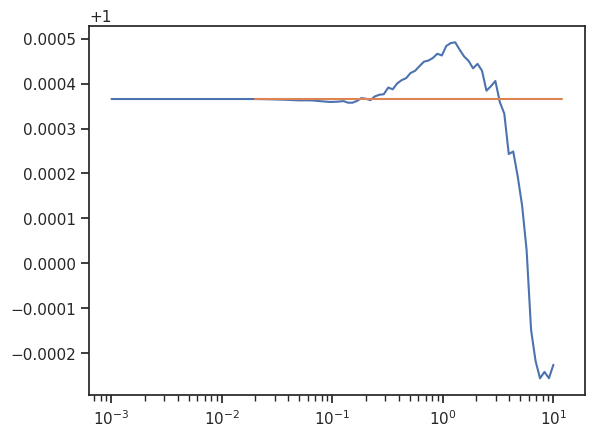

In [20]:
k_test = np.logspace(-3, 1, 100)

plt.semilogx(k_test, np.interp(k_test, k_all, bk_target.reshape(len(k_all))))
plt.semilogx(k_all, bk_target[0]*np.ones(len(k_all)))